<a href="https://colab.research.google.com/github/WisdomSeller/dump/blob/main/Control_Arboles_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  %load_ext rpy2.ipython

In [ ]:
#Instalacion de librerias necesarias.
%%R
install.packages("tree")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tree_1.0-42.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 47949 bytes (46 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R
set.seed(123456)  #Semilla.
library(tree)
data <- read.table("pima-indians-diabetes.csv",header=TRUE,sep=',')  #Para leer el csv.
#Variables discretas:
data$Nembarazada <- factor(data$Nembarazada) 
data$Diabetes <- factor(data$Diabetes)
head(data)

  Nembarazada Glucosa Presion Triceps Insulina  IMC Pedigree Edad
1           6     148      72      35        0 33.6    0.627   50
2           1      85      66      29        0 26.6    0.351   31
3           8     183      64       0        0 23.3    0.672   32
4           1      89      66      23       94 28.1    0.167   21
5           0     137      40      35      168 43.1    2.288   33
6           5     116      74       0        0 25.6    0.201   30
  Diabetes....... Diabetes
1        1;;;;;;; 1;;;;;;;
2        0;;;;;;; 0;;;;;;;
3        1;;;;;;; 1;;;;;;;
4        0;;;;;;; 0;;;;;;;
5        1;;;;;;; 1;;;;;;;
6        0;;;;;;; 0;;;;;;;


# **Pregunta 1**

In [ ]:
%%R
print(dim(data))

[1] 768  10


In [ ]:
#Definir Testing y Training Set
%%R
train_size <- floor(0.70 * nrow(data)) #Definir % de training, el resto es para testear.
#Separar el data de entrenamiento y el de testeo.
train_mask <- sample(seq_len(nrow(data)),size= train_size)
train <- data[train_mask,] #70%
test <- data[-train_mask,] #30%
print(dim(train))
print(dim(test))

[1] 537  10
[1] 231  10



Classification tree:
tree(formula = Diabetes ~ Nembarazada + Glucosa + Presion + Triceps + 
    Insulina + IMC + Pedigree + Edad, data = train)
Variables actually used in tree construction:
[1] "Glucosa"     "IMC"         "Nembarazada" "Edad"        "Triceps"    
[6] "Presion"     "Pedigree"   
Number of terminal nodes:  18 
Residual mean deviance:  0.698 = 362.3 / 519 
Misclassification error rate: 0.1713 = 92 / 537 


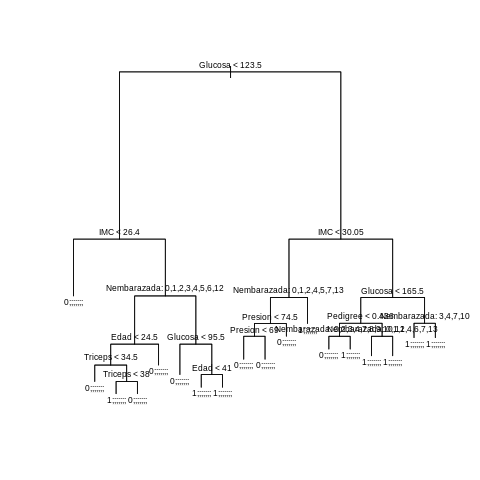

In [ ]:
%%R
#Construcción del árbol
arbol = tree(Diabetes ~ Nembarazada + Glucosa + Presion + Triceps + Insulina + IMC + Pedigree + Edad, data = train)
#Mostrar árbol
plot(arbol)
text(arbol, pretty=1, cex=.7)
summary(arbol) #Data del árbol.

In [ ]:
%%R
#Generar matriz de conflicto para saber cantidad de falsos positivos y data real, por ej.
prediccion <- predict(arbol,test,type='class')
conf_matrix <- with(test,table(prediccion,test$Diabetes))
conf_matrix

          
prediccion 0;;;;;;; 1;;;;;;;
  0;;;;;;;      125       37
  1;;;;;;;       34       35


In [ ]:
%%R
acc <- sum(diag(conf_matrix))/nrow(test)
acc #Exactitud.

[1] 0.6233766


In [ ]:
%%R
miss_class_error = 1-acc
miss_class_error #El resto.

[1] 0.3766234


# **Pregunta 2**

In [ ]:
#Pregunta 2
%%R
train2 <- data[train_mask, ]
test2 <- data[-train_mask, ]
arbol2 = tree(Diabetes ~ Nembarazada + Presion + Triceps + Insulina + Pedigree + Edad, data = train2)
arbol2

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 537 704.80 0;;;;;;; ( 0.63501 0.36499 )  
   2) Edad < 28.5 250 241.70 0;;;;;;; ( 0.81200 0.18800 )  
     4) Triceps < 34.5 203 155.40 0;;;;;;; ( 0.87192 0.12808 )  
       8) Nembarazada: 1,2,6 106  27.30 0;;;;;;; ( 0.97170 0.02830 ) *
       9) Nembarazada: 0,3,4,5,8 97 106.30 0;;;;;;; ( 0.76289 0.23711 )  
        18) Edad < 21.5 17   0.00 0;;;;;;; ( 1.00000 0.00000 ) *
        19) Edad > 21.5 80  95.98 0;;;;;;; ( 0.71250 0.28750 )  
          38) Pedigree < 0.6355 70  75.26 0;;;;;;; ( 0.77143 0.22857 ) *
          39) Pedigree > 0.6355 10  12.22 1;;;;;;; ( 0.30000 0.70000 ) *
     5) Triceps > 34.5 47  64.62 0;;;;;;; ( 0.55319 0.44681 )  
      10) Pedigree < 0.7185 42  55.82 0;;;;;;; ( 0.61905 0.38095 ) *
      11) Pedigree > 0.7185 5   0.00 1;;;;;;; ( 0.00000 1.00000 ) *
   3) Edad > 28.5 287 397.40 1;;;;;;; ( 0.48084 0.51916 )  
     6) Insulina < 123.5 207 282.90 0;;;;;;; ( 0.57005 0.42995 )  
   


Classification tree:
tree(formula = Diabetes ~ Nembarazada + Presion + Triceps + Insulina + 
    Pedigree + Edad, data = train2)
Variables actually used in tree construction:
[1] "Edad"        "Triceps"     "Nembarazada" "Pedigree"    "Insulina"   
Number of terminal nodes:  11 
Residual mean deviance:  0.9346 = 491.6 / 526 
Misclassification error rate: 0.2477 = 133 / 537 


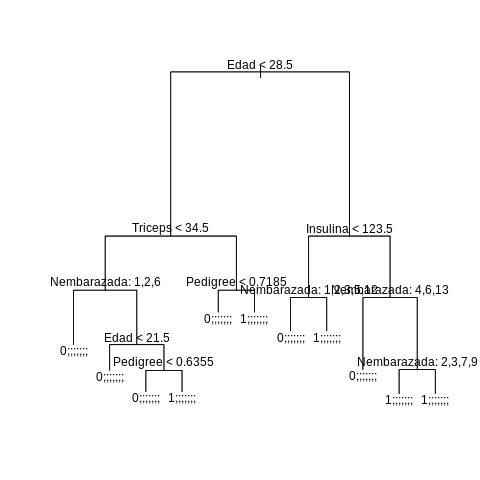

In [ ]:
%%R
plot(arbol2)
text(arbol2,pretty=1)
summary(arbol2)

In [ ]:
%%R
#Evaluacion Segundo Arbol
pred <- predict(arbol2,test2,type='class')
conf_matrix <- with(test2,table(pred,test2$Diabetes))
conf_matrix

          
pred       0;;;;;;; 1;;;;;;;
  0;;;;;;;      103       31
  1;;;;;;;       56       41


In [ ]:
%%R
acc <- sum(diag(conf_matrix))/nrow(test2)
acc

[1] 0.6233766


In [ ]:
%%R
miss_class_error <- 1 - acc
miss_class_error

[1] 0.3766234


# **Pregunta 3**
(2,30,71,26,5.3, 27, 0.33, 40)                         
Edad (40) < 28.5 --> NO (DERECHA)                    
Insulina (5.3) < 123.5 --> YES (IZQUIERDA)                       
Nembarazada (2) == 1,2,3,5,12 --> YES (IZQUIERDA)                                 
CLASS = NO DIABETES